# Broadway Data Scrape EDA and initial Analysis of Data

<b>Importing important packages and getting a view of first 10 rows:</b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('statsOutput.csv')
data.head(10)

,ShowID,Date,Gross,Attendance,% Capacity,# Previews,# Perf.
0,#NAME?,26-May-24,"$877,626",7540,92%,0,8
1,#NAME?,02-Jun-24,"$775,476",6824,83%,0,8
2,#NAME?,09-Jun-24,"$863,817",7109,87%,0,8
3,#NAME?,16-Jun-24,"$838,262",7142,87%,0,8
4,#NAME?,23-Jun-24,"$1,038,278",7689,94%,0,8
5,#NAME?,30-Jun-24,"$949,677",7813,95%,0,8
6,#NAME?,07-Jul-24,"$844,143",7734,94%,0,8
7,#NAME?,14-Jul-24,"$891,323",7604,93%,0,8
8,#NAME?,21-Jul-24,"$933,990",7397,90%,0,8
9,#NAME?,28-Jul-24,"$974,362",7866,96%,0,8


<b>Initial observations:<b>

<ul>
    <li><u>Potential error with data scrape:</u> When first opened data file in excel, noticed that some select entries in the ShowID column were displaying as invalid formulas, because they started with dashes ('-'). Under further inspection, it could mean that the regular expression search formula did not account for cases where the broadway shows started with non alphabetical characters, such as the show "& Juliet" (534962). Scrape errors in this category will be flagged in a new column.</li>
    <li><u>ShowID Transformation:</u> As the show id column follows the pattern show name and show id number, under the assumption that both of them are separate values, their fields may be better separated into show id and show title columns to enhance data quality.</li>
</ul>

<b>Preliminary data analysis:</b>

In [6]:
data.shape

(25991, 7)

Dataset has 25991 rows and 7 columns.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25991 entries, 0 to 25990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ShowID      25991 non-null  object
 1   Date        25991 non-null  object
 2   Gross       25991 non-null  object
 3   Attendance  25991 non-null  int64 
 4   % Capacity  25991 non-null  object
 5   # Previews  25991 non-null  int64 
 6   # Perf.     25991 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


Dataset has no null values

Need to change Attendance from float to int

Need to change Date from object to datetime

Need to change % Capacity to float and convert to decimal

Need to change Gross to int

In [10]:
# DATA TRANSFORMATIONS

data['% Capacity'] = data['% Capacity'].apply(lambda x : (int(x[:-1]))/100)
data['Attendance'] = data['Attendance'].astype('int64')
data['Date'] = pd.to_datetime(data['Date'], format="%d-%b-%y")
data['Gross ($)'] = data['Gross'].apply(lambda x : int(x[1:].replace(',','')))

data.describe(include='all')

,ShowID,Date,Gross,Attendance,% Capacity,# Previews,# Perf.,Gross ($)
count,25991,25991,25991,25991.000000,25991.000000,25991.000000,25991.000000,2.599100e+04
unique,379,NaN,25734,NaN,NaN,NaN,NaN,NaN
top,chicago-4804,NaN,"$727,178",NaN,NaN,NaN,NaN,NaN
freq,1395,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011-05-12 12:05:14.139509760,NaN,8968.211920,0.854178,0.405794,7.497788,8.499829e+05
min,NaN,1996-03-24 00:00:00,NaN,250.000000,0.090000,0.000000,0.000000,1.334100e+04
25%,NaN,2005-01-23 00:00:00,NaN,7032.000000,0.760000,0.000000,8.000000,4.857875e+05
50%,NaN,2011-05-01 00:00:00,NaN,8625.000000,0.890000,0.000000,8.000000,7.324430e+05
75%,NaN,2017-07-30 00:00:00,NaN,10914.000000,0.980000,0.000000,8.000000,1.067926e+06
max,NaN,2025-02-02 00:00:00,NaN,21144.000000,1.150000,11.000000,15.000000,5.037392e+06


<b>Basic Data Cleanup:</b>

In [12]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [13]:
data['Date'].dtype

dtype('<M8[ns]')

No duplicate data.

<b>Broadway Sales over Time<b>

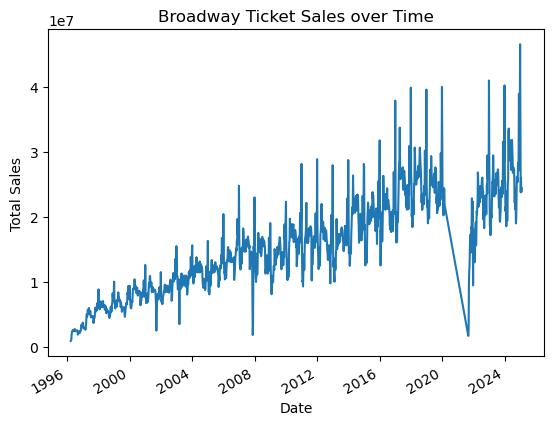

In [19]:
data.groupby('Date')['Gross ($)'].sum().plot(title='Broadway Ticket Sales over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

<b>Examining Seasonality in Sales<b>

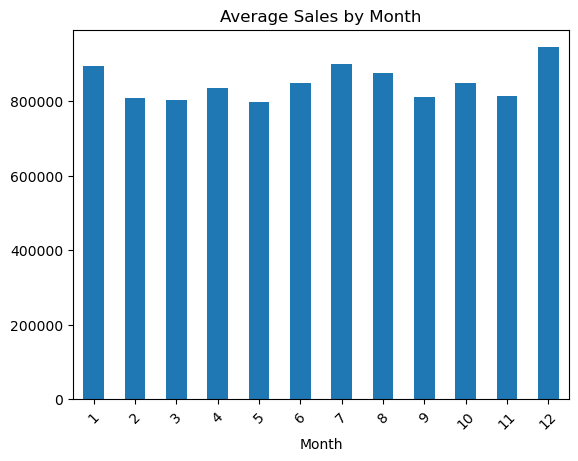

In [21]:
data['Month'] = data['Date'].dt.month
data.groupby('Month')['Gross ($)'].mean().plot(kind='bar', title='Average Sales by Month')
plt.xticks(rotation=45)
plt.show()

December and January (Christmas/Winter Holidays) seem to noticeably have the highest number of sales by month on average.

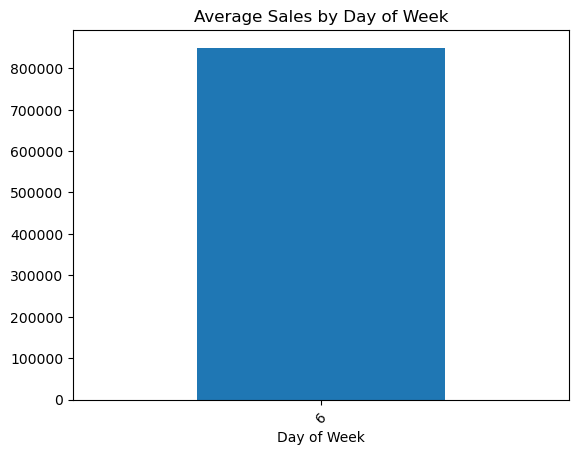

In [23]:
data['Day of Week'] = data['Date'].dt.dayofweek
data.groupby('Day of Week')['Gross ($)'].mean().plot(kind='bar', title='Average Sales by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [24]:
data['Day of Week']

0        6
1        6
2        6
3        6
4        6
        ..
25986    6
25987    6
25988    6
25989    6
25990    6
Name: Day of Week, Length: 25991, dtype: int32

Upon further inspection, it seems that all broadway shows recorded in the data seem to be from Sundays (6). Either the shows needed for data collection are intended to only be from Sundays, or more data from other days of the week will need to be collected to gather more diversified data.

<b>Outlier Detection<b>

<Axes: ylabel='Gross ($)'>

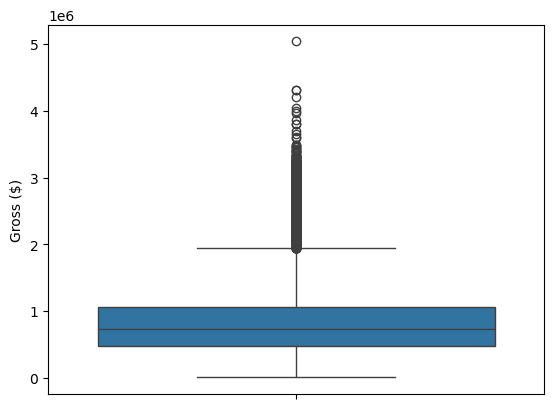

In [27]:
sns.boxplot(data=data, y='Gross ($)')

Given the box-plot, gross sales for broadway shows appear to be right skewed, which can be explained by several factors:

<ul>
    <li>Sales may have grown over time due to increased ticket price increase over time, so it may be interesting to standardize on a yearly basis</li>
    <li>Large amount of outliers on the high (right) side could be explained by hit shows which had premium pricing and drew large audience sizes, so it may be important to consider and analyze the Show Ids for the shows that grossed over $2 million</li>
    <li>Since ticket prices were given from 1996, it may need to be inflation adjusted as well</li>
</ul>

# Inflation Adjusting Gross Entries

In [30]:
cpi_data = pd.read_excel('CPI NYC CUURS12ASA0.xlsx')

<b>Preliminary Data Analysis</b>

In [32]:
cpi_data.tail(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
20,2016,260.342,260.875,261.508,262.619,263.312,263.877,263.722,264.160,264.602,264.738,265.203,265.421,263.365,262.089,264.641
21,2017,266.917,267.662,267.582,267.948,268.183,268.666,268.051,268.657,270.059,269.575,269.381,269.564,268.520,267.826,269.215
22,2018,270.771,272.214,272.196,272.950,274.001,274.170,274.073,274.441,275.455,275.101,274.478,273.836,273.641,272.717,274.564
23,2019,275.144,275.823,276.570,277.441,278.068,278.802,278.817,279.428,279.338,279.255,279.468,279.816,278.164,276.975,279.354
24,2020,282.020,282.577,281.975,280.623,282.092,282.333,283.624,283.478,284.551,284.121,283.291,284.350,282.920,281.937,283.903
25,2021,285.525,286.474,287.481,289.493,290.991,293.872,293.553,293.927,295.488,296.472,297.490,296.865,292.303,288.973,295.633
26,2022,300.164,301.151,305.024,307.781,309.243,313.589,312.615,313.280,313.880,314.338,314.975,315.656,310.141,306.159,314.124
27,2023,318.151,319.295,319.038,319.211,320.002,321.290,322.496,324.380,325.613,325.288,324.520,324.691,321.998,319.498,324.498
28,2024,328.006,328.606,329.829,331.270,332.633,334.782,335.642,336.534,337.889,338.166,338.535,338.610,334.209,330.854,337.563
29,2025,341.144,342.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    30 non-null     int64  
 1   Jan     30 non-null     float64
 2   Feb     30 non-null     float64
 3   Mar     29 non-null     float64
 4   Apr     29 non-null     float64
 5   May     29 non-null     float64
 6   Jun     29 non-null     float64
 7   Jul     29 non-null     float64
 8   Aug     29 non-null     float64
 9   Sep     29 non-null     float64
 10  Oct     29 non-null     float64
 11  Nov     29 non-null     float64
 12  Dec     29 non-null     float64
 13  Annual  29 non-null     float64
 14  HALF1   29 non-null     float64
 15  HALF2   29 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 3.9 KB


<ul>
    <li>Since using annual averages for CPI, no need to transform dataframe shape (months as columns)</li>
    <li>Need to change Year column to dt format</li>
    <li>Can remove redundant rows (Months, Half1, Half2)</li>
</ul>

In [43]:
cpi_data = cpi_data.loc[:,['Year', 'Annual']]

# Taking the average of Jan and Feb for 2025 and using it to fill in 2025 Null Value
cpi_data.loc[29, 'Annual'] = np.mean([341.144, 342.333])

<b>Joining CPI Index Data with Weekly Grosses by Year</b>

In [49]:
# Extract year from weekly grosses data and ensure it is in new integer column 'Year'
data['Year'] = data['Date'].dt.year
data['Year'].dtype

dtype('int32')

In [51]:
# left join data from weekly grosses to CPI values by year column
df = pd.merge(left=data, right=cpi_data, how='left', on='Year')

In [53]:
df.tail(10)

,ShowID,Date,Gross,Attendance,% Capacity,# Previews,# Perf.,Gross ($),Month,Day of Week,Year,Annual
25981,youre-a-good-man-charlie-brown-5211,1999-03-28,"$180,375",3799,0.43,0,8,180375,3,6,1999,177.0
25982,youre-a-good-man-charlie-brown-5211,1999-04-04,"$268,714",5129,0.58,0,8,268714,4,6,1999,177.0
25983,youre-a-good-man-charlie-brown-5211,1999-04-11,"$246,442",5313,0.61,0,8,246442,4,6,1999,177.0
25984,youre-a-good-man-charlie-brown-5211,1999-04-18,"$175,063",3760,0.43,0,8,175063,4,6,1999,177.0
25985,youre-a-good-man-charlie-brown-5211,1999-04-25,"$159,229",3595,0.41,0,8,159229,4,6,1999,177.0
25986,youre-a-good-man-charlie-brown-5211,1999-05-02,"$136,469",3387,0.39,0,8,136469,5,6,1999,177.0
25987,youre-a-good-man-charlie-brown-5211,1999-05-09,"$144,106",3635,0.41,0,8,144106,5,6,1999,177.0
25988,youre-a-good-man-charlie-brown-5211,1999-05-16,"$138,969",3530,0.40,0,8,138969,5,6,1999,177.0
25989,youre-a-good-man-charlie-brown-5211,1999-05-23,"$134,123",3449,0.39,0,8,134123,5,6,1999,177.0
25990,youre-a-good-man-charlie-brown-5211,1999-05-30,"$127,578",3425,0.39,0,8,127578,5,6,1999,177.0


In [55]:
# Creating new column CPI Factor - divides current 2025 CPI by CPI in the given column year
df['CPI Factor'] = 341.7385 / df['Annual']
df['Adjusted Gross'] = df['CPI Factor'] * df['Gross ($)']

In [57]:
df.tail(10)

,ShowID,Date,Gross,Attendance,% Capacity,# Previews,# Perf.,Gross ($),Month,Day of Week,Year,Annual,CPI Factor,Adjusted Gross
25981,youre-a-good-man-charlie-brown-5211,1999-03-28,"$180,375",3799,0.43,0,8,180375,3,6,1999,177.0,1.930726,348254.700212
25982,youre-a-good-man-charlie-brown-5211,1999-04-04,"$268,714",5129,0.58,0,8,268714,4,6,1999,177.0,1.930726,518813.103328
25983,youre-a-good-man-charlie-brown-5211,1999-04-11,"$246,442",5313,0.61,0,8,246442,4,6,1999,177.0,1.930726,475811.974107
25984,youre-a-good-man-charlie-brown-5211,1999-04-18,"$175,063",3760,0.43,0,8,175063,4,6,1999,177.0,1.930726,337998.683760
25985,youre-a-good-man-charlie-brown-5211,1999-04-25,"$159,229",3595,0.41,0,8,159229,4,6,1999,177.0,1.930726,307427.568455
25986,youre-a-good-man-charlie-brown-5211,1999-05-02,"$136,469",3387,0.39,0,8,136469,5,6,1999,177.0,1.930726,263484.244952
25987,youre-a-good-man-charlie-brown-5211,1999-05-09,"$144,106",3635,0.41,0,8,144106,5,6,1999,177.0,1.930726,278229.199328
25988,youre-a-good-man-charlie-brown-5211,1999-05-16,"$138,969",3530,0.40,0,8,138969,5,6,1999,177.0,1.930726,268311.059924
25989,youre-a-good-man-charlie-brown-5211,1999-05-23,"$134,123",3449,0.39,0,8,134123,5,6,1999,177.0,1.930726,258954.761782
25990,youre-a-good-man-charlie-brown-5211,1999-05-30,"$127,578",3425,0.39,0,8,127578,5,6,1999,177.0,1.930726,246318.160186


<b>Inflation Adjusted Sales over Time</b>

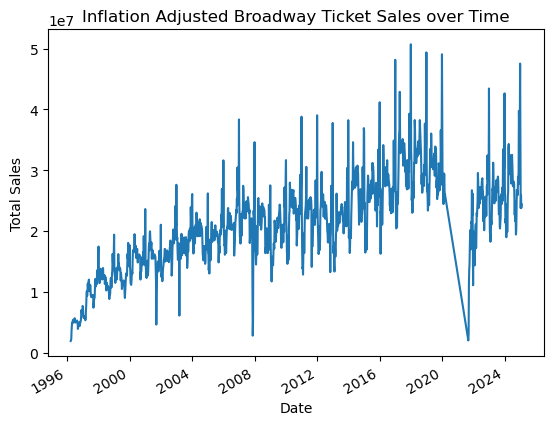

In [60]:
df.groupby('Date')['Adjusted Gross'].sum().plot(title='Inflation Adjusted Broadway Ticket Sales over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

<b>Remove Redundant Columns</b>

In [65]:
df.drop(['Gross', 'Day of Week', 'Annual', 'CPI Factor'], axis=1, inplace=True)

<b>Correcting Error with Show ID</b>

In [76]:
# Manually imputing '& Juliet' Show ID to those not read by csv file properly
df['ShowID'] = df['ShowID'].apply(lambda x: '&-juliet-534962' if x == '#NAME?' else x)	

In [78]:
df.head(5)

,ShowID,Date,Attendance,% Capacity,# Previews,# Perf.,Gross ($),Month,Year,Adjusted Gross
0,&-juliet-534962,2024-05-26,7540,0.92,0,8,877626,5,2024,8.973983e+05
1,&-juliet-534962,2024-06-02,6824,0.83,0,8,775476,6,2024,7.929469e+05
2,&-juliet-534962,2024-06-09,7109,0.87,0,8,863817,6,2024,8.832782e+05
3,&-juliet-534962,2024-06-16,7142,0.87,0,8,838262,6,2024,8.571475e+05
4,&-juliet-534962,2024-06-23,7689,0.94,0,8,1038278,6,2024,1.061670e+06
